# **Assignment 02**
### **Notebook Submitted By:** 
### &nbsp;&nbsp;&nbsp;&nbsp; 1. Taimoor Hasan Khan (CMS ID - 360625)
### &nbsp;&nbsp;&nbsp;&nbsp; 2. Hammad Awan (CMS ID - 361450)
### **Course:** Graphical Models for Autnomous Systems
### **Professor:** Dr. Hafsa Iqbal

# **Author Contributions**
Equal contribution to Q2. ChatGPT was used to develop the table in LaTeX as we hate coding tables.

- ### A1: Hammad Awan

Code for loading datasets, network architectures, and split assignments (train/val/test).

- ### A2: Taimoor Hasan Khan

Code for training/evaluating model, PCA/TSNE, visualization, and animation.

> **Note:** You can play around with some global settings in Step 4 to see how the results change. We have different settings for model learning, whether to use PCA/TSNE, node coloring, etc. Animations take time, so maybe comment the aniation blocks or reduce epochs when tweaking things.

---
***Please collapse everything except the editor to view output cells properly.***
## Task
Classify nodes in a graph using different types of GNNs:
1. Graph Convolutional Network (GCN) 
2. Graph Sample and Aggregation (GraphSAGE)
3. Graph Attention Transformers / Networks (GAT)

For this assignment, we'll be using:
- **Graph Dataset:** Zachary's Karate Club Network (ZKC) PyG variant with 4 classes.
- **Language:** Python
- **Main Modules:** PyTorch Geometric, NetworkX, Sklearn for TSNE and PCA
- **Split Setting:** Transductive owing to small size of ZKC.

## Animation Links
The blocks to animate take a long time (up to 10 minutes @ 500 epochs with TSNE) as it performs first either PCA/TSNE, and then saves/encodes the video locally prior to displaying. If time is not a luxury, please view the animations for our run at the following links:

- GCN: https://drive.google.com/file/d/1hlPucOJDIUk4tmjTyCQ_d7UjPWuKI6Zn/view?usp=sharing
- GSAGE: https://drive.google.com/file/d/13ns0hhZJcNHakxkwZt8rJ4ayPZXVi6I5/view?usp=sharing
- GAT: https://drive.google.com/file/d/1F_8CexTKr_Q9yz6i9OULCr0KyefJVmsD/view?usp=sharing
- Side-by-side: https://drive.google.com/file/d/1QfAFhneuewTBaGk6hNXmM6hVWpAPj8fo/view?usp=sharing

---
## **Q2: (10 Points)**
We present the best model accuracies over 500 epochs on all three models. To ensure fair comparison, we have used the same number of layers and parameters for all three. The only thing that will change in the architecture is the network block. We further present the visualizations for all models' performances to see how they compare. 

In our experience, for ZKC, the GCN performs best for almost all settings, while the GAT only exceeds GCN performance with Tanh activation. GSAGE underfits on all the settings we tested.

The results are mostly expected because of the small size and static nature of ZKC. The inductive frameworks of GSAGE and GAT are much more suited for larger, complex, and dynamic graphs where GCN becomes quite costly (requirement of entire graph). Additionally, GAT and GSAGE excel at capturing local structure whereas GCN captures the global structure better. 

However, we did not expect GAT to outperform GCN or even GSAGE by such a large margin in any setting because of the small size and relatively few edges in the dataset. Interestingly, it's the best-performing model with the best loss/acc history at just 4/34 nodes for training. **It may be because Node 0 (a training node) is a major node of interest as it represents the club instructor. In the graph, this node has a rich local structure as it connects to a lot of other nodes.** We think this is why it outperforms both models in this case. It may also be possible to further improve performance by providing the other major node, 33 (the club president).

The model architecture is:
```
Conv = GCNConv, GraphSAGE, or GATConv 
Layer 1: Conv (num_features to 16) -> Tanh -> Dropout 
Layer 2: Conv (16 to 8) -> Tanh -> Dropout
Layer 3: Conv (8 to 6) -> Tanh -> Dropout
Layer 4: DenseClassifier (6 to num_classes) -> LogSoftmax
```

The splits are:
- **Train:** 4 nodes
- **Val  :** 4 nodes
- **Test :** 26 nodes

The final embeddings by the model are 34x6, and the classifier output is a 34x4, so the embeddings are 6D vectors against each node and the prediction vector is 4D (scores against each of the 4 classes). In the current model, a final 6D embedding vector outperforms the 2D vector from the homework notebook. To visualize these embeddings, we have utilized PCA (with the option to switch to TSNE but that takes longer) to reduce the embeddings to 2D.

> Note that using three layers of graph-based operations is probably not the best idea for a small dataset like ZKC. It may be possible to improve performance with just two or even one layer. We wanted to remain faithful to the homework notebook.

## Notes on GCN, GraphSAGE, and GAT
There are a few key differences in the models. The first is how they aggregate information from the graph. 
1. GCNConv convolves aggregates the node features alongside its neighbors, but it utilizes the normalized adjacency matrix to weigh them. This means it uses the **entire graph's features**. The **aggregation function** is a simple linear combination of the node & neighbor featrues, alongside the weighted adjacenecy matrix.
2. GraphSAGE (Sample and AGgrEgate) limits to just a **fixed-size neighborhood** and additionally samples them (does not use them all). The architecture is flexible and can take several **aggregation functions** may be mean, pool, LSTM, etc.
3. GAT is like SAGE and limits to a certain **fixed size neighborhood**, but additionally uses attention heads to capture relative importance of the neightbors. The **aggregation function** is based on the learned coefficients of the attention mechanism alongside the hidden weights.

The difference between GCNs and the other two. The former is favored for transductive learning frameworks, whereas the latter two are preferred for inductive learning frameworks. However, (I believe with the exception of GCN), they can practically be used in either setting.

In **transductive settings**, we provide the model with the full graph structure, and only splits the labels. So, during training, the model has access to all nodes and all edges, but it does not know the label of any node apart from the training and validation set. In this case, the splits are not completely indepdenent and are related by their structure. 

On the other hand, the **inductive learning framework** cuts off the edges between splits, forcing independence at the cost of structural relationships that may exist between them in the original graph. So for a single graph network, an inductive setting would split the graph into three subgraphs, and the respective losses and accuracies are evaluated in isolation within each set/graph (train acc can only be observed on train nodes, test acc only on test nodes, etc.)

We also note that our setup is not the *best* way to compare on the basis of transductivity/inductivity, since the graph is **static**. The real advantage of inductive frameworks is in generalizing to new and unseen nodes, aka **dynamically growing graphs**. In that case, a GCN would need to be retrained from scratch for every new iteration of the graph, whereas GAT and GSAGE would work just fine owing to their inductive learning nature.

This is the only part of this notebook with ChatGPT, because nobody likes coding tables in LaTeX.

\begin{array}{llll}
\hline
\textbf{Method} & \textbf{Approach} & \textbf{Aggregation Method} & \textbf{Flexibility} \\
\hline
\text{GCN} & 
\text{numerical} & 
\begin{aligned}
&\text{linear combination} \\ &\text{weighted by normalized adjacency} 
\end{aligned} &
\begin{aligned}
&\text{limited} \\ &\text{retrain if graph changes} 
\end{aligned}
\\
\hline
\text{GSAGE} & \text{inductive} & 
\begin{aligned}
&\text{sampled neighbors} \\ &\text{various aggregation functions} 
\end{aligned} & 
\begin{aligned}
&\text{adaptive} \\ &\text{generalizes to unseen nodes}
\end{aligned}
\\
\hline
\text{GAT} & \text{attention} & 
\begin{aligned}
&\text{neighbor features} \\ &\text{learned attention coefficients}
\end{aligned} & 
\begin{aligned}
&\text{highly adaptive} \\ &\text{generalizes to unseen nodes}
\end{aligned} 
\\
\hline
\end{array}




***
# Preliminary

In [1]:
# CORE: -q = --quiet, quiet installation.
!pip -q install torch torch-geometric
# EXTRA: Times block runs automatically.
!pip -q install ipython-autotime
%load_ext autotime

time: 1.55 ms (started: 2023-05-01 16:49:09 +00:00)


- `tqdm` for progress bars. 
- `netowrkx` for graph visualizations. 
- `matplotlib` for embedding visualizations and animation of training epochs. 
- `sklearn` for reducing dimensions of network embeddings which may offer better results than the 2D embeds from HW.
- `torch_geometric` and `torch` for graph-based neural networks. 
- `IPython.display.HTML()` for animation gif in output cell.

In [2]:
import sys
from tqdm import tqdm
import numpy as np
from copy import deepcopy

import torch
from torch.nn import Linear, Dropout, ReLU, Tanh, Sigmoid, LogSoftmax, Softmax, CrossEntropyLoss
from torch.optim import Adam
from torch_geometric.datasets import KarateClub
from torch_geometric.nn import GCNConv, SAGEConv, GATConv
from torch_geometric.utils import to_networkx, to_undirected
import networkx as nx

# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
from matplotlib.animation import FuncAnimation, FFMpegWriter
plt.rcParams.update({'font.size': 14})

from IPython.display import HTML, Video
from base64 import b64encode

time: 5.18 s (started: 2023-05-01 16:49:09 +00:00)


# Step 1: Define the Graph Networks

In [3]:
# @title (Graph Networks)
# These classes will inherit the methods and attributes of torch.nn.Module base class.

# Can also use BasicGNN high-level submodule to access pre-built GCN, GAT, and GraphSAGE
# networks. It is somewhat customizable, but it is not intended as part of the core library 
# and only used by the authors of PyG for some specific examples on GitHub.

class GCN(torch.nn.Module):
    def __init__(self, dataset):
        """Creates a graph convolutional network (GCN) based on the torch.nn.Module base class. 
        # ARCHITECTURE:
            Layer 1: GCNConv (num_features to 16) -> Tanh -> Dropout 
            Layer 2: GCNConv (16 to 8) -> Tanh -> Dropout
            Layer 3: GCNConv (8 to 6) -> Tanh -> Dropout
            Layer 4: DenseClassifier (6 to num_classes) -> LogSoftmax
        # PARAMETERS:
            dataset: A `torch_geometric.data.Dataset` object.
        """

        # Initialize the base class (torch.nn.Module) constructor for GCN class.
        super().__init__()
        torch.manual_seed(42)

        # Define the network's layers. In this case, we add two GCNConv blocks.
        # torch_geometric.nn.GCNConv(input_size, num_neurons). Output size equals num_neurons.

        # Layer 1
        # ============================
        self.conv1 = GCNConv(dataset.num_features, 16)
        self.act1 = Tanh()
        self.dropout1 = Dropout(p=0.15)

        # Layer 2
        # ============================
        self.conv2 = GCNConv(16, 8)
        self.act2 = Tanh()
        self.dropout2 = Dropout(p=0.15)

        # Layer 3 - Final Embeddings
        # ============================
        self.conv3 = GCNConv(8, 6)
        self.act3 = Tanh()
        self.dropout3 = Dropout(p=0.15)

        # Layer 4
        # ============================
        self.classifier = Linear(6, dataset.num_classes)
        self.act4 = LogSoftmax(dim=1)  

        # NOTE on Layer 4: Our feature map has the shape (num_nodes, num_classes). We need 
        # softmax along dim_node_features for each row (node) so dim needs to be 1. This applies 
        # softmax along columns (picks a row/node, then softmaxes over its columns/feature_vector).

    def forward(self, data):
        """Forward pass through the network.
        # PARAMETERS:
            data: A `torch_geometric.data.Data` object.
        # RETURNS:
            preds: The normalized (via softmax) classification vector.
        """
        input, edge_index = data.x, data.edge_index
        h = self.conv1(input, edge_index)
        h = self.act1(h)
        h = self.dropout1(h)
        h = self.conv2(h, edge_index)
        h = self.act2(h)
        h = self.dropout2(h)
        h = self.conv3(h, edge_index)
        embeddings = self.act3(h)
        h = self.dropout3(embeddings)

        # In DL, logits are the final layer's output without activation. Not to be confused with
        # the mathematical function.
        logits = self.classifier(h)
        preds = self.act4(logits)

        return preds, embeddings

# I will not be commenting for the next two classes. They follow the same process, just the
# conv operation will change from GCNConv to SAGEConv and GATConv.

class GraphSAGE(torch.nn.Module):
    def __init__(self, dataset):
        """Creates a graph convolutional network (GCN) based on the torch.nn.Module base class. 
        # ARCHITECTURE:
            Layer 1: SAGEConv (num_features to 16) -> Tanh -> Dropout 
            Layer 2: SAGEConv (16 to 8) -> Tanh -> Dropout
            Layer 3: SAGEConv (8 to 6) -> Tanh -> Dropout
            Layer 3: DenseClassifier (6 to num_classes) -> LogSoftmax
        # PARAMETERS:
            dataset: A `torch_geometric.data.Dataset` object.
        """
        super().__init__()
        torch.manual_seed(42)

        self.conv1 = SAGEConv(dataset.num_features, 16)
        self.act1 = Tanh()
        self.dropout1 = Dropout(p=0.15)
        self.conv2 = SAGEConv(16, 8)
        self.act2 = Tanh()
        self.dropout2 = Dropout(p=0.15)
        self.conv3 = SAGEConv(8, 6)
        self.act3 = Tanh()
        self.dropout3 = Dropout(p=0.15)
        self.classifier = Linear(6, dataset.num_classes)
        self.act4 = LogSoftmax(dim=1)  

    def forward(self, data):
        """Forward pass through the network.
        # PARAMETERS:
            data: A `torch_geometric.data.Data` object.
        # RETURNS:
            preds: The normalized (via softmax) classification vector.
        """
        input, edge_index = data.x, data.edge_index
        h = self.conv1(input, edge_index)
        h = self.act1(h)
        h = self.dropout1(h)
        h = self.conv2(h, edge_index)
        h = self.act2(h)
        h = self.dropout2(h)
        h = self.conv3(h, edge_index)
        embeddings = self.act3(h)
        h = self.dropout3(embeddings)
        logits = self.classifier(h)
        preds = self.act4(logits)

        return preds, embeddings

class GAT(torch.nn.Module):
    def __init__(self, dataset):
        """Creates a graph attention transformer (GAT) based on the torch.nn.Module base class. 
        # ARCHITECTURE:
            Layer 1: GATConv (num_features to 16) -> Tanh -> Dropout
            Layer 2: GATConv (16 to 8) -> Tanh -> Dropout
            Layer 3: GATConv (8 to 6) -> Tanh -> Dropout
            Layer 4: DenseClassifier (6 to num_classes) -> LogSoftmax
        # PARAMETERS:
            dataset: A `torch_geometric.data.Dataset` object.
        """
        super().__init__()
        torch.manual_seed(42)

        # By default, no. of attention heads equals 1. Can change with `heads` keyword argument.
        self.conv1 = GATConv(dataset.num_features, 16)
        self.act1 = Tanh()
        self.dropout1 = Dropout(p=0.15)
        self.conv2 = GATConv(16, 8, heads=1)
        self.act2 = Tanh()
        self.dropout2 = Dropout(p=0.15)
        self.conv3 = GATConv(8, 6, heads=1)
        self.act3 = Tanh()
        self.dropout3 = Dropout(p=0.15)
        self.classifier = Linear(6, dataset.num_classes)
        self.act4 = LogSoftmax(dim=1)  

    def forward(self, data):
        """
        Forward pass through the network.
        # PARAMETERS:
            data: A `torch_geometric.data.Data` object.
        # RETURNS:
            preds: The normalized (via softmax) classification vector.
        """
        input, edge_index = data.x, data.edge_index
        h = self.conv1(input, edge_index)
        h = self.act1(h)
        h = self.dropout1(h)
        h = self.conv2(h, edge_index)
        h = self.act2(h)
        h = self.dropout2(h)
        h = self.conv3(h, edge_index)
        embeddings = self.act3(h)
        h = self.dropout3(embeddings)
        logits = self.classifier(h)
        preds = self.act4(logits)

        return preds, embeddings

time: 3.19 ms (started: 2023-05-01 16:49:14 +00:00)


# Step 2 &ndash; Functions
Main bulk of code. Train, Test, TSNE/PCA, visualizations, animation etc. It's kind of long, so the viewer can just skip to the next parts if not editing code.

In [4]:
# @title Bunch of Functions - Skip if Just Viewing
gen_hexcolors_per_class = lambda colormap, num_classes: [to_hex(colormap(i)) for i in np.linspace(0, 1, num_classes)] 
animation_progress_callback = lambda i, n: print(f"\rSaving frame: {i+1}/{n}", end="")

def get_tsne_embeddings(
    embeddings, 
    random_state=42, 
    perplexity=10, 
    early_exaggeration=16.0, 
    use_prev_embed_to_init_new=False
):
    """Generates 2D TSNE embeddings via sklearn.manifold.TSNE() for a given list of high-dimensional data.
    ### PARAMETERS
        `embeddings` (list of ndarray or list of torch.tensor): List of high-dimensional embeddings to generate 
    TSNE of. Each element of the list may be n-dimensional of the shape (num_nodes, embedding_dimension), 
    i.e., each row is a separate instance of the same quantity represented with another embedding of equal 
    dims. The list format helps facilitate creating embeddings for comparison.
        `random_state` (int, optional): TSNE argument. Sets the model's random state for learning the 2D embeddings.
        `perplexity` (int, optional): TSNE argument. Defines how much importance local structures are given in 
    generating the embeddings. If low, captures global structure better. If high, captures local structure better.
    CANNOT be larger than the number of samples (nodes) in the graph.
        `early_exaggeration` (float, optional): TSNE argument. Defines how far apart the learnt 2D embeddings are,
    aka how exaggerated the embedding distances appear.
        `use_prev_embed_to_init_new` (bool, optional): If set, only initializes with PCA when calculating 
    the first TSNE embedding. All the following embeddings recursively utilize the latest TSNE embedding as
    the initial guess. Useful when animating (creates a more cohesive result).
    ### RETURNS
    `tsne_embeddings` (list of ndarray): List of 2D TSNE embeddings of the shape (num_nodes, 2).
    """
    # Force convert to list of tensors if not a list (even if just a single epoch's embeddings).
    if not isinstance(embeddings, list):
        print("[INFO] Provided embeddings were not a list of embeddings. Forcefully converting them to list.")
        embeddings = [embeddings]

    # Convert to numpy if tensor.
    for i, embedding in enumerate(embeddings):
        if torch.is_tensor(embedding):
            print("[INFO] Encountered tensor embedding. Converting it to numpy.")
            embeddings[i] = embedding.detach().cpu().numpy()

    tsne_embeddings = []

    if use_prev_embed_to_init_new:
        # Get first TSNE embedding with PCA initialization (default).
        tsne = TSNE(n_components=2, random_state=random_state, perplexity=perplexity, 
                    early_exaggeration=early_exaggeration)
        tsne_embedding = tsne.fit_transform(embeddings[0])
        tsne_embeddings.append(tsne_embedding)

        # Implement TSNE for all following embeddings by initializing from the latest TSNE embedding.
        # This should make the animation more coherent, rather than randomly initializing with
        # PCA every time.
        for embedding in tqdm(embeddings[1:], desc="Reducing embeddings to 2D", ascii=True):
            tsne = TSNE(n_components=2, random_state=random_state, perplexity=perplexity, 
                        early_exaggeration=early_exaggeration, init=tsne_embeddings[-1],
                        learning_rate='auto')  
            tsne_embedding = tsne.fit_transform(embedding)
            tsne_embeddings.append(tsne_embedding)

    else:
        for embedding in tqdm(embeddings, desc="Reducing embeddings to 2D", ascii=True):
            tsne = TSNE(n_components=2, random_state=random_state, perplexity=perplexity, 
                        early_exaggeration=early_exaggeration)  
            tsne_embedding = tsne.fit_transform(embedding)
            tsne_embeddings.append(tsne_embedding)

    return tsne_embeddings


def get_pca_embeddings(
    embeddings, 
    random_state=42, 
    whiten=True
):
    """Generates 2D PCA embeddings via sklearn.decomposition.PCA() for a given list of high-dimensional data.
    Inherently utilizes the full SVD solver to generate the 2D embeddings. Much faster than TSNE and better
    maintains global structure, but it is linear and will not model complex local relationships well. 
    ### PARAMETERS
        `embeddings` (list of ndarray or list of torch.tensor): List of high-dimensional embeddings to generate 
    PCA of. Each element of the list may be n-dimensional of the shape (num_samples, embedding_dimension), 
    i.e., each row is a separate instance of the same quantity represented with another embedding of equal 
    dims. The list format helps facilitate creating embeddings for comparison.
        `whiten` (bool, default=True): The whiten argument in sklearn.decomposition.PCA(). It normalizes the 
    values using the singular values and standard deviation.
    ### RETURNS
        `pca_embeddings` (list of ndarray or list of torch.tensor): List of 2D PCA embeddings of the shape 
    (num_samples, 2).
    """
    # Force convert to list of tensors if not a list (even if just a single epoch's embeddings).
    if not isinstance(embeddings, list):
        print("[INFO] Provided embeddings were not a list of embeddings. Forcefully converting them to list.")
        embeddings = [embeddings]

    # Convert to numpy if tensor.
    for i, embedding in enumerate(embeddings):
        if torch.is_tensor(embedding):
            print("[INFO] Encountered tensor embedding. Converting it to numpy.")
            embeddings[i] = embedding.detach().cpu().numpy()

    pca_embeddings = []

    for embedding in tqdm(embeddings, desc="Reducing embeddings to 2D", ascii=True):
        pca = PCA(n_components=2, svd_solver="full", random_state=random_state)  
        pca_embedding = pca.fit_transform(embedding)
        pca_embeddings.append(pca_embedding)

    return pca_embeddings


def train_model(
    model,
    data, 
    train_mask,
    val_mask,
    criterion=None, 
    optimizer=None,  
    num_epochs=500, 
    modelname="model",
    save_history=False,
    return_best_only=False
):
    """
    Train the given model using the given graph data and train and validation masks.
    ### PARAMETERS
        `model` (torch.nn.Module): The PyTorch model to train.
        `data` (torch_geometric.data.Data): The graph dataset as loaded into PyTorch. 
        `train_mask` (bool ndarray): Mask for the training subset of nodes.
        `val_mask` (bool ndarray): Mask for the validation subset of nodes.
        `criterion` (torch.nn.Crietrion): One of the torch.nn loss crieterions.  
        `optimizer` (torch.optim.Optimizer): One of the torch.optim optimizers. 
        `num_epochs` (int): The number of epochs to train the model for.
        `modelname` (str): The name to save the model to disk with.
        `save_history` (bool, optional): If set, returns a complete history of the training in dict of dict format.
    Saves embeddings, losses, and accuracies for each epoch.
        `return_best_only` (bool, optional): If set, returns and saves only the best model. The best model has the 
    lowest values for both training and validation losses and accuracies.
    ### RETURNS
        `model` (torch.nn.Module): The trained PyTorch model.
        `params` (dict of dicts): The outer key is a single epoch number (best or latest model), and its value is another
    dictionary with keys 'embeddings', 'labels', and 'metrics'. Embeddings is a 2D array of shape (num_nodes, embed_dims)
    representing the node embeddings, labels is the predicted label vector of size (num_nodes), and metrics is a dict
    with keys 'train_loss', 'val_loss', 'train_acc', 'val_acc'.
        `history` (dict of dicts): Full training history of the model (all epochs) in the same dict (epoch) of dicts 
    (embeds, labels, metrics) form as `params`.
    """
    # Handle optional arguments.
    metric_keys = ["train_loss", "val_loss", "train_acc", "val_acc"]

    if criterion is None:
        criterion = CrossEntropyLoss()
    if optimizer is None:
        optimizer = Adam(model.parameters(), lr=0.01)
    if save_history:
        # History Structure: Epoch (int) -> Embeddings (str), Labels (str), Metrics (str)
        #                                      (ndarray)       (ndarray)          |
        #                                                                         | (subdict)
        #                                                                         V
        #                                                                   MetricName (str)
        #                                                                       (float)  
        history = {
            epoch: {
                "embeddings": None,
                "labels": None,
                "metrics": {metric: None for metric in metric_keys}
            }
            for epoch in range(num_epochs)
        }

    # Init best metrics trackers.
    best_model = None
    best_epoch = None
    best_embeddings = None
    best_labels = None
    best_train_loss = float("Inf")
    best_val_loss = float("Inf")
    best_train_acc = 0.
    best_val_acc = 0.

    true_labels = data.y
    train_true_labels = true_labels[train_mask]
    val_true_labels = true_labels[val_mask]

    for epoch in range(num_epochs):
        # Standard PyTorch training step. Set to train, zero gradients (since torch accumulates them
        # expecting batches), forward pass the data through the model, calculate loss value, backprop
        # through the model to update gradients, and make an optimizer step to update all params according
        # to the gradients.
        model.train()
        optimizer.zero_grad()
        preds, pred_embeddings = model(data)
        train_loss = criterion(preds[train_mask], train_true_labels)
        with torch.no_grad():
            val_loss = criterion(preds[val_mask], val_true_labels)
        train_loss.backward()
        optimizer.step()
        
        # From the raw output of the classifier, find the maximum voted label for each node.
        pred_labels = torch.argmax(preds, axis=1)

        # Calculate training accuracy on our subset of training nodes (based on which we classify the rest).
        train_pred_labels = pred_labels[train_mask]
        train_acc = torch.mean(torch.where(train_pred_labels == train_true_labels, 1, 0).float())
        
        # Calculate validation accuracy on our subset of validation nodes we defined earlier.
        val_pred_labels = pred_labels[val_mask]
        val_acc = torch.mean(torch.where(val_pred_labels == val_true_labels, 1, 0).float())

        # Update previous bests if current epoch improved the loss while maintaining or improving both the
        # train and validation accuracies.  
        if train_loss <= best_train_loss and val_loss <= best_val_loss and val_acc >= best_val_acc and train_acc >= best_train_acc:
            best_model = model
            best_epoch = epoch
            best_embeddings = pred_embeddings.detach().cpu().numpy()
            best_labels = pred_labels.detach().cpu().numpy()
            best_train_loss = train_loss.item()
            best_val_loss = val_loss.item()
            best_train_acc = train_acc.item()
            best_val_acc = val_acc.item()

        # Update history if set to save.
        if save_history:
            history[epoch]["embeddings"] = pred_embeddings.detach().cpu().numpy()
            history[epoch]["labels"] = pred_labels.detach().cpu().numpy()
            history[epoch]["metrics"]["train_loss"] = train_loss.item()
            history[epoch]["metrics"]["val_loss"] = val_loss.item()
            history[epoch]["metrics"]["train_acc"] = train_acc.item()
            history[epoch]["metrics"]["val_acc"] = val_acc.item()

    print("========================================")
    print("              [BEST MODEL]              ") 
    print("========================================")
    print("@ Epoch:", best_epoch)
    print("Train Accuracy = {:.2f}%\nVal Accuracy: {:.2f}%\nTrain Loss: {:.2f}\nVal Loss: {:.2f}".format(
        best_train_acc * 100, best_val_acc * 100, best_train_loss, best_val_loss))
    print("========================================")
    print("             [LATEST MODEL]             ") 
    print("========================================")
    print("@ Epoch:", num_epochs - 1)
    print("Training Accuracy = {:.2f}%\nValidation Accuracy: {:.2f}%\nTrain Loss: {:.2f}\nVal Loss: {:.2f}".format(
        train_acc * 100, val_acc * 100, train_loss, val_loss))
    print("========================================")

    if return_best_only:
        # Return and save the best model iteration.
        model = best_model
        metrics = [best_train_loss, best_val_loss, best_train_acc, best_val_acc]
        params = {
            best_epoch: {
                "embeddings": best_embeddings,
                "labels": best_labels,
                "metrics": dict(zip(metric_keys, metrics))
            }
        }
        torch.save(model.state_dict(), modelname + ".pt")
        print("[INFO] Saved and returned best model.")

    else:
        # Return and save the latest model iteration.
        epoch = num_epochs - 1
        metrics = [train_loss.item(), val_loss.item(), train_acc.item(), val_acc.item()]
        params = {
            epoch: {
                "embeddings": pred_embeddings.detach().cpu().numpy(),
                "labels": pred_labels.detach().cpu().numpy(),
                "metrics": dict(zip(metric_keys, metrics))
            }
        }
        torch.save(model.state_dict(), modelname + ".pt")
        print("[INFO] Saved and returned latest model.")

    return model, params, history
        

def evaluate_model(model, data, train_mask, val_mask, test_mask):
    """Evaluates the given PyTorch model by classifying the nodes.
    ### PARAMETERS
        `model` (torch.nn.Module): The PyTorch model.
        `data` (torch_geometric.data.Data): The data object as loaded by PyTorch.
        `train_mask` (bool ndarray): Boolean mask indicating the training node set.
        `val_mask` (bool ndarray): Boolean mask indicating the validation node set.
        `test_mask` (bool ndarray): Boolean mask indicating the testing node set.
    ### RETURNS
        `predictions` (dict): A dictionary containing predicted embeddings, labels, confidences, the raw post-activation
    prediction scores from the final layer of the model, and the accuracy metrics. Labels & confidences are 1D vectors of
    size (num_nodes,), whereas the raw prediction scores are 2D @ (num_nodes, num_labels). The accuracy metrics are a
    dict with keys 'all_acc', 'true_acc', 'val_acc', and 'test_acc'.
    """
    true_labels = data.y
    train_true_labels = true_labels[train_mask]
    val_true_labels = true_labels[val_mask]
    test_true_labels = true_labels[test_mask]

    model.eval()
    with torch.no_grad():

        # FIRST, we evaluate over all data.
        # 1. Forward pass to get classifier output and previous layer's embeddings.
        preds, pred_embeddings = model(data)
        
        # 2. From the classifier output of shape 34x4, get the maximum classification score 
        # against each node. Also get the corresponding index to this score - it's the node's
        # predicted label. Both the score and label vectors are 34x1.
        pred_max_scores, pred_labels = preds.max(dim=1)
        
        # 3. Get the number of correct predictions by element-wise comparing the true data labels
        # with the predicted node labels and summing the result.
        num_correct_preds = pred_labels.eq(data.y).sum().item()

        # 4. Compute the accuracy.
        all_acc = num_correct_preds / len(data.x) 

        # SECOND, Splitwise data evaluation. Procedure is the same, but this time we use split masks.
        # preds[train_mask] and preds[val_mask] are 4x4, and preds[test_mask] is 26x4.
        train_pred_max_scores, train_pred_labels = preds[train_mask].max(dim=1)
        test_pred_max_scores, test_pred_labels = preds[test_mask].max(dim=1)
        val_pred_max_scores, val_pred_labels = preds[val_mask].max(dim=1)

        train_acc = torch.mean(torch.where(train_pred_labels == train_true_labels, 1, 0).float())
        val_acc = torch.mean(torch.where(val_pred_labels == val_true_labels, 1, 0).float())
        test_acc = torch.mean(torch.where(test_pred_labels == test_true_labels, 1, 0).float())

        print("========================================")
        print("          [EVALUATION RESULTS]          ") 
        print("========================================")
        print("Overall Accuracy = {:.2f}%\nTraining Accuracy: {:.2f}%\nValidation Accuracy: {:.2f}%\nTesting Accuracy: {:.2f}%".format(
            all_acc * 100, train_acc * 100, val_acc * 100, test_acc * 100))
        print("========================================")

        accuracy_types = ["all_acc", "train_acc", "val_acc", "test_acc"]
        accuracies = [all_acc, train_acc, val_acc, test_acc]
        
        predictions = {
            "embeddings": pred_embeddings.detach().cpu().numpy(),   # node embeddings (34x6)
            "labels": pred_labels.detach().cpu().numpy(),           # highest predicted labels (34x1)
            "confidence":  pred_max_scores.detach().cpu().numpy(),  # highest predicted labels' scores (34x1)
            "scores": preds.detach().cpu().numpy(),                 # raw classifier label scores (34x4)
            "accuracies": dict(zip(accuracy_types, accuracies))     # overall and splitwise classification accuracy
        }

        return predictions


def ax_visualize_graph(ax, graph, true_labels, pos=None, cmap="Set2", draw_labels=False):
    """Visualization function for NX graph."""
    if pos is None:
        pos = nx.spring_layout(graph, seed=42)
    ax.axis("off")
    nx.draw_networkx(
        graph, pos=pos, with_labels=draw_labels, node_size=400, node_color=true_labels, 
        cmap=cmap, edge_color=(0,0,0,0.15), font_color=(0,0,0,0.5)
    )
    return ax


def ax_visualize_loss_history(ax, lst_epoch, lst_train_loss, lst_val_loss):      
    ax.plot(lst_epoch, lst_train_loss, 'b', linewidth=1, alpha=0.5)
    ax.plot(lst_epoch, lst_val_loss, 'r--', linewidth=1, alpha=0.5)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.set_title("Loss History")
    ax.legend(["train_loss", "val_loss"])
    return ax


def ax_visualize_acc_history(ax, lst_epoch, lst_train_acc, lst_val_acc):
    ax.plot(lst_epoch, lst_train_acc, 'b', linewidth=1, alpha=0.5)
    ax.plot(lst_epoch, lst_val_acc, 'r--', linewidth=1, alpha=0.5)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Accuracy)")
    ax.set_title("Accuracy History")
    ax.legend(["train_acc", "val_acc"])
    return ax


def ax_visualize_2d_embeddings(
    ax,
    embeddings,
    train_epoch=None,
    train_metrics=None,
    eval_metrics=None,
    true_labels=None, 
    pred_labels=None,
    mask_expose_labels=None,
    true_color_nodes=False,
    cmap="Set2",
):
    """Visualizes 2D embeddings in a matplotlib plot. May be TSNE embeddings or direct network embeddings as long as they 
    are 2D.
    ### PARAMETERS
        `ax` (matplotlib.pyplot.Axes): An axis object corresponding to draw visualizations on.
        `embeddings` (ndarray): Array of shape (num_nodes, 2), where 2 is the embedding dimension. 
        `train_epoch` (int, optional): If provided, displays the epoch number as part of axes title. Intended for use with 
    `train_metrics`, but can be used separately.
        `train_metrics` (dict, optional): A dictionary with keys 'train_loss', 'val_loss' 'train_acc', 'val_acc', as in the 
    format obtained from `train_model()`. Epoch number can be provided separately as `train_epoch`.
        `eval_metrics` (dict, optional): A dictionary with keys 'all_acc', 'train_acc', 'val_acc', 'test_acc' corresponding
    to typical evaluation metrics (overall and splitwise). This format is automatically returned by `evaluate_model()`.
        `true_labels` (ndarray): A flat vector of size (num_nodes,) where each component represents a node, and the value 
    represents that node's true label.
        `pred_labels` (ndarray, optional): A flat vector of size (num_nodes,) where each component represents a node, and 
    the value  represents that node's predicted label.
        `mask_expose_labels` (ndarray, optional): A boolean mask of the same shape as `true_labels`/`pred_labels` where the 
    True values represent the nodes whose true labels are considered exposed. For exposed nodes, any misclassifications by
    the model will be marked with a red X. If not provided, all labels are kept hidden. Useful in limiting the scope of the 
    labeled data to the respective split. 
        `true_color_nodes` (bool, optional): If set, assigns node colors according to the `true_labels` of the dataset. 
    Otherwise, assigns node colors according to the epoch's `pred_labels`. Only affects the scatter plot.
        `cmap` (str): Matplotlib colormap string on which basis to generate unique colors for each node. Color generation
    is done via an internal call to `gen_colors_per_class()` with the colormap argument.
    ### RETURNS
        `ax`: The axis object with drawings.
    ---
    TODO: Consider using NX for this part as well. The `pos` argument in nx.draw_networkx() should be
    the embeddings.
    `pos_dict = {node: embedding for node, embedding in zip(range(len(embeddings)), embeddings)}`
    """
    # Input checks.
    errors = []
    warnings = []
    has_errors = False
    has_warnings = False

    if train_metrics is not None and eval_metrics is not None:
        has_errors = True
        errors.append("- Cannot have both training and evaluation metrics at once.")
    if true_color_nodes and true_labels is None:
        has_errors=True
        errors.append("- Cannot color nodes according to true labels since true labels were not provided.")
    if mask_expose_labels is not None and (pred_labels is None or true_labels is None):
        has_errors = True
        errors.append("- Mask to misclassify nodes was provided but either true or predicted labels were not.")
    if embeddings.shape[1] != 2:
        has_errors = True
        errors.append(f"- Encountered bad embedding size (expected 2D, found {embeddings.shape[1]}D).")
    if train_epoch and not train_metrics:
        has_warnings = True
        warnings.append("- Training epoch was provided but training metrics were not. Consider not passing the epoch.")

    if has_errors:
        error_msg = "Failed to visualize embeddings.\n\t" + "\n\t".join(err for err in errors)
        sys.exit(error_msg)
    elif has_warnings:
        print("[WARNINGS]\n\t" + "\n\t".join(warn for warn in warnings))

    legend = ["Class 0", "Class 1", "Class 2", "Class 3"]

    if true_labels is not None or pred_labels is not None:
        # Get the colors of the colormap.
        colormap = plt.get_cmap(cmap)
        # Generate hex color for each class.
        num_classes = len(np.unique(true_labels))
        color_list = gen_hexcolors_per_class(colormap, num_classes)

    # Set title based on which metrics were provided.
    if train_metrics is not None:
        train_loss, val_loss, train_acc, val_acc = train_metrics.values()
        if train_epoch is not None:
            ax.set_title("Training Mode - Epoch {}\nLoss = {:.2f} / {:.2f} (train-val)\nAccuracy = {:.2f}% / {:.2f}% (train-val)".format(
                train_epoch, train_loss, val_loss, train_acc * 100, val_acc * 100))
        else:
            ax.set_title("Training Mode\nLoss = {:.2f} / {:.2f} (train-val)\nAccuracy = {:.2f}% / {:.2f}% (train-val)".format(
               train_loss, val_loss, train_acc * 100, val_acc * 100))
    elif eval_metrics is not None:
        all_acc, train_acc, val_acc, test_acc = eval_metrics.values()
        ax.set_title("Evaluation Mode\nOverall Accuracy = {:.2f}%\nSplit Accuracies = {:.2f}% / {:.2f}% / {:.2f}% (train-val-test)".format(
            all_acc * 100, train_acc * 100, val_acc * 100, test_acc * 100))
    else:
        if train_epoch is not None:
            ax.set_title(f"Node Embedding Space - Epoch {train_epoch}")
        else:
            ax.set_title("Node Embedding Space")

    # Plot the node embeddings with the corresponding color from the colormap, or a static color.
    if true_color_nodes:
        for i, color in enumerate(color_list):
            ax.scatter(embeddings[true_labels==i, 0], embeddings[true_labels==i, 1], c=color, s=200)
    elif not true_color_nodes and pred_labels is not None:
        for i, color in enumerate(color_list):
            ax.scatter(embeddings[pred_labels==i, 0], embeddings[pred_labels==i, 1], c=color, s=200)
    else:
        ax.scatter(embeddings[:, 0], embeddings[:, 1], c="#1f77b4", s=200)
    
    # Mark misclassified nodes for masked nodes if mask, predicted labels, and true labels provided. 
    # Otherwise don't mark any misclassified nodes.
    if mask_expose_labels is not None:
        for i, node_embedding in enumerate(embeddings[mask_expose_labels]):
            if true_labels[mask_expose_labels][i] != pred_labels[mask_expose_labels][i]:
                ax.plot(node_embedding[0], node_embedding[1], "rx", markersize=10, markeredgewidth=2, alpha=0.70)
        legend.append("Bad Label")
    else:
        pass
        
    ax.legend(legend)
    ax.set_xlabel("$\mathregular{X_{embedding}}$")
    ax.set_ylabel("$\mathregular{Y_{embedding}}$")
    return ax


def animate_embedding_history(
    fig,
    axes,
    hists,
    true_labels,
    mask_expose_labels=None,
    true_color_nodes=False,
    display_metrics=True,
    cmap="Set2",
    desired_fps=5
):
    """Animates 2D training history embeddings either directly from the network, or after dimension reduction from higher 
    dimensional embeddings. The function is developed with the assumption the user wants to animate the development of the 
    embeddings over training, and offers a few customazibility options as mentioned in parameter descriptions.

    The function additionally supports multiple models' histories being plotted on the same figure as different subplots.
    The figure and axes setup is left to the user, this function will only take the inititated figure object and the axes 
    (subplots) you want to animate the visualizations in.

    ### PARAMETERS
        `fig`: Matplotlib figure target for animation.
        `axes`: List of matplotlib axes (even if just one).
        `hists` (list of dicts): A list of train history dictionaries - one for each train session - as provided by 
    `train_model()`. The embeddings SHOULD BE REDUCED to 2D if not already. Each train session history contains an outer 
    dictionary keyed with the epoch number, and an inner dictionary keyed with 'embeddings', 'labels', and 'metrics'. Within 
    an epoch, the node embeddings should be 2D ndarrays, the labels a 1D vector containing the highest scored labels for each 
    node, and metrics should be a dict keyed with 'train_loss', 'val_loss', 'train_acc', and 'val_acc'.
        `true_labels` (ndarray): A flat vector of size (num_nodes,) where each component represents a node, and the value 
    represents that node's true label.
        `mask_expose_labels` (ndarray, optional): A boolean mask of the same shape as `true_labels`/`pred_labels` where the 
    True values represent the nodes whose true labels are considered exposed. For exposed nodes, any misclassifications by
    the model will be marked with a red X. If not provided, all labels are kept hidden. Useful in limiting the scope of the 
    labeled data to the respective split. 
        `true_color_nodes` (bool, optional): If set, assigns node colors according to the `true_labels` of the dataset. 
    Otherwise, assigns node colors according to the epoch's `pred_labels`. Only affects the scatter plot.
        `cmap` (str): Matplotlib colormap string on which basis to generate unique colors for each node. Color generation
    is done via an internal call to `gen_colors_per_class()` with the colormap argument.
        `desired_fps` (int, optional): The FPS at which the animation plays back.
    ### RETURNS
        `anim`: A matplotlib.animation.FuncAnimation() animator object with a defined update target based on the train 
    embeddings. Number of frames is equal to the length of the history, and the interval is set to 200 for 5 fps videos.
    ---
    ### TODO: 
    Possibly draw nodes using networkx with the pos argument set to the embeddings. Maybe make a 2x2 subplot
    where the first row spans both columns and contains the embeddings animation, while the second row's first column
    has the losses (overlayed val and train), and the second column has the accuracies (overlayed val and train).
    """
    def ax_visualize(ax, title, epoch, embeddings, pred_labels):
        ax.cla()
        ax.axis('off')
        ax.set_title(title)

        # 1. Plot the nodes as colored markers.
        if true_color_nodes:
            # 1.1) Plot the nodes with colors according to their true labels.
            for j, color in enumerate(color_list):
                ax.scatter(embeddings[true_labels==j, 0], embeddings[true_labels==j, 1], c=color, s=200)
        else:
            # 1.2) Plot the node with colors according to predicted labels.
            for j, color in enumerate(color_list):
                ax.scatter(embeddings[pred_labels==j, 0], embeddings[pred_labels==j, 1], c=color, s=200)            

        # 2. As per `mask_expose_labels`, mark misclassified nodes with a red X.
        if mask_expose_labels is not None:
            # 2.1) Mark exposed label nodes if misclassified.
            for i, node_embedding in enumerate(embeddings[mask_expose_labels]):
                if true_labels[mask_expose_labels][i] != pred_labels[mask_expose_labels][i]:
                    ax.plot(node_embedding[0], node_embedding[1], "rx", markersize=10, markeredgewidth=2, alpha=0.70)
        else:
            # 2.2) DO NOT mark any nodes as misclassified.
            pass


    # For animating on multiples axes (useful for subplots and comparing train progress side-by-side).
    def update_axes(epoch):
        # Loop over the axes and the histories. Since we input checked, we are sure that all the different histories
        # have the same length as the number of axes. The rest of the animation process remains the same.
        for i, (ax, hist) in enumerate(zip(axes, hists)):
            epoch_embeddings = hist[epoch]["embeddings"]
            epoch_labels = hist[epoch]["labels"]
            epoch_metrics = hist[epoch]["metrics"]

            if display_metrics:
                train_loss, val_loss, train_acc, val_acc = epoch_metrics.values()
                title = "History {} - Training Epoch {}\nLoss = {:.2f} / {:.2f} (train-val)\nAccuracy = {:.2f}% / {:.2f}% (train-val)".format(
                    i+1, epoch, train_loss, val_loss, train_acc * 100, val_acc * 100)
            else:
                title = f"History{i+1}, Training Epoch {epoch}"

            ax_visualize(ax, title, epoch, epoch_embeddings, epoch_labels)

        fig.tight_layout()
    
    # INPUT CHECKS
    # ============================================================
    # Force convert to list of ndarray if not a list (even if just a single epoch's embeddings).
    errors = []
    warnings = []
    has_errors = False
    has_warnings = False
    if not isinstance(hists, list):
        has_warnings = True
        warnings.append("- Provided history/histories were not in the required list of dcits. Converting to list...", end="")
        try:
            hists = [hists]
            warnings[-1] += "FAILED."
        except:
            has_errors = True
            warnings[-1] += "FAILED."
            errors.append("- Could not convert given history to list of dicts.")

    if not isinstance(axes, list) and not isinstance(axes, np.ndarray):
        has_warnings = True
        warnings.append("- Provided axes was not a numpy.ndarray or list of axes. Converting to list...")
        try:
            axes = [axes]
            warnings[-1] += "SUCCESS."
        except:
            has_errors = True
            warnings[-1] += "FAILED."
            errors.append("- Could not convert given axes to list of axes.")

    # For all the given histories, check the first epoch's embedding dimensions. IF they are not 2D, exit with error.
    for hist in hists:
        embedding_dim = hist[0]["embeddings"].shape[1]
        if embedding_dim != 2:
            has_errors = True
            errors.append(f"- Expected 2D embeddings in history, received at least one {embedding_dim}D embeddings.")

    # Ensure the provided mask is correct.
    if mask_expose_labels is not None: 
        if isinstance(mask_expose_labels, type(np.ndarray)):
            if mask_expose_labels.dtype != bool:
                has_errors = True
                errors.append("- Provided mask array was not boolean.")
        else:
            has_errors = True
            errors.append("- Provided mask array was not numpy.ndarray.")

    if len(axes) != len(hists):
        has_errors = True
        errors.append("- Length of axes does not equal the number of histories.")

    if has_warnings:
        print("[WARNINGS]\n\t" + "\n\t".join(warn for warn in warnings))
    
    elif has_errors:
        error_msg = "Failed to visualize embeddings.\n\t" + "\n\t".join(err for err in errors)
        sys.exit(error_msg)


    # ANIMATION PART
    # ============================================================
    # Generate color list for nodes.
    colormap = plt.get_cmap(cmap)
    num_classes = len(np.unique(true_labels))
    color_list = gen_hexcolors_per_class(colormap, num_classes)

    # Get history size for each history. These are our frames.
    frames = [len(hist) for hist in hists]
    frame_duration = 1000 / desired_fps

    # Update function.
    anim = FuncAnimation(
        fig, 
        update_axes,
        frames=max(frames),
        interval=frame_duration,
        blit=False,
        repeat=True)
    
    return anim

time: 10.5 ms (started: 2023-05-01 16:49:15 +00:00)


# Step 3 &ndash; Loading Dataset and Splits
Note that PyTorch Geometric uses a 4 class version of ZKC based on modularity clustering. Originally, the dataset has only 2 classes. This is to make the classification problem a little more complex.

Importantly, `data.train_mask` returns True for four nodes in the graph. These are the nodes we know the ground truth labels for. It is necessary to have them for learning the embeddings in a semi-supervised manner for all the nodes and training the model to classify the entire graph. 

Using the training mask, we can create our own masks for **validation** and **testing**. We define the validation set size equal to the training size. We decide to pick the nodes immediately after the training nodes as our validation nodes. In practice, this is a simple index increment. 

First, we find the indices of True values in `train_mask` using `np.flatnonzero()`, which returns a flattened vector of indices corresponding to the True values in `train_mask`. These are the four nodes in our training set. We init a vector of boolean zeros (size 34) and index into it using the incremented indices of the training nodes. We set only these indices to True, and voila, we have the validation mask.

The testing mask is now really simple. Since the validation and training sets are *disjoint*, we can simply add their masks together to get all the used up nodes. We then elementwise invert this to get all the unused nodes, and assign them to our testing mask.

KarateClub()
Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Train Mask Nodes: 0, 4, 8, 24
Val Mask Nodes: 1, 5, 9, 25
Test Mask Nodes: 2, 3, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33


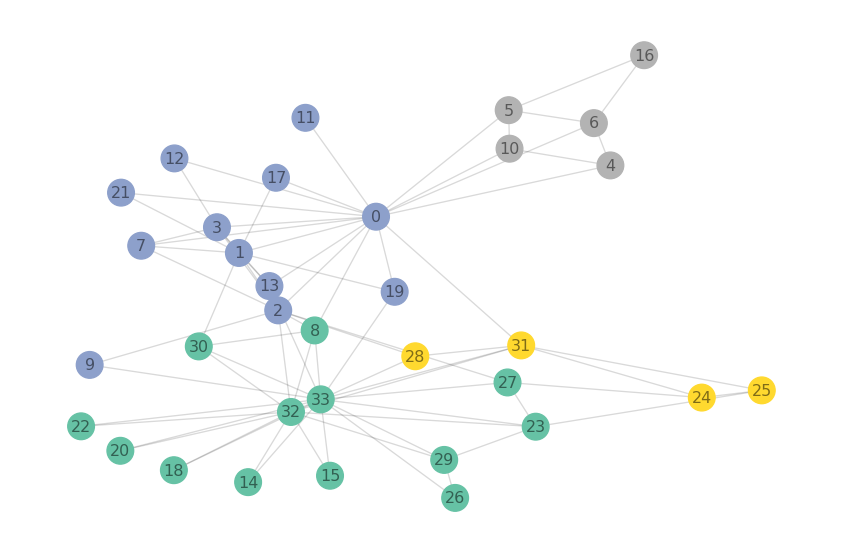

time: 311 ms (started: 2023-05-01 16:49:15 +00:00)


In [5]:
# @title Dataset Handling
dataset = KarateClub()
data = dataset[0]
print(dataset)
print(data)

# Get the indices of the ground truth nodes (train set mask).
train_mask = data.train_mask.cpu().numpy()
train_nodes = np.flatnonzero(train_mask)

# Set one node next to each training node as the validation node to generate the validation 
# set mask and also get its indices.
val_mask = np.zeros((34,), dtype=bool)  # mask of zeros
val_mask[train_nodes + 1] = True        # index into init mask with train node indices, offset by 1 to get validation indices, and set True
val_nodes = np.flatnonzero(val_mask)    # we did not save the validation indices in the last step, so we save them now (same way as train_mask)

# Invert the Train + Val mask for the unassigned nodes. This generates our test set mask.
# Get its indices as well.
test_mask = ~(train_mask + val_mask)
test_nodes = np.flatnonzero(test_mask)

# Used in some functions in conjunction with pred and true labels to identify misclassified nodes.
full_mask = train_mask + val_mask + test_mask

print("Train Mask Nodes: {}".format(", ".join([str(node) for node in train_nodes])))
print("Val Mask Nodes: {}".format(", ".join([str(node) for node in val_nodes])))
print("Test Mask Nodes: {}".format(", ".join([str(node) for node in test_nodes])))

# Get the true labels.
true_labels = data.y.cpu().numpy()

plt.figure(figsize=(9,6), dpi=96)
ax = plt.gca()

G = to_networkx(data, to_undirected=True)
ax_visualize_graph(ax, G, true_labels=true_labels, cmap="Set2", draw_labels=True)

plt.tight_layout()
plt.show()

# Step 4 &ndash; Training and Evaluating Models
The animation blocks tend to take a lot of time. Comment them out if time is not a luxury.

### Global Settings
The user has access to some **global settings** like number of epochs, learning rate, which loss to use, animation fps, etc.

One-by-one, the models are trained & evaluated, visualized (best train-time and eval-time embeddings along with loss/acc histories), and the training embedding histories are animated. All the steps are completed for one model before moving to the next. 

### Training & Evaluation
Training is done on 8 out of 34 nodes, where 4 nodes each are designated the training and validation nodes. We return the best performing model (or latest, not necessarily the best if user specifies), it's corresponding 6D embeddings, predicted labels, and metrics, along with the training history (optional). For animation, the history is necessary. 

Testing is done by evaluating accuracy on all nodes as well as the train-test-val splits. Here, main parameter of interest is the overall accuracy (all 34 nodes) and test accuracy (26 nodes not used in training).

### Visualization
Generates 2D embeddings of the graph nodes for the best trained model and the evaluation model using either TSNE or PCA, and then plots the training history's metrics (requires history to be saved during training) alongside the 2D embeddings. 

Misclassified nodes are marked with a red X. This can be masked to mimic the training (only misclassified train/val nodes marked) or evaluation setting (all misclassified nodes marked).

Embeddings are colored according to node labels. Either the true node label colors or the predicted node label colors can be used by setting or clearing `true_color_nodes`. If say, Node 1 had actual label 'a' (color yellow) and was predicted by the model as 'b' (color red), setting the variable will color the node's embedding as yellow, and clearing it would color it red. **Currently, it is set to True for non-animation visualizations.**

### Embedding History Animation

The drive links to the animations are provided in the first text block.

This step requires the complete training history. **Currently, `true_color_nodes` is set to False for all animations**, and **no misclassified nodes are marked** (`true_node_mask` set to 0 instead of `train_mask`, `val_mask`, or `test_mask`, or `None` which marks all misclassified nodes).

The animation for the models takes time because first we have to run PCA on all embeddings in addition to video encode, and we can choose to skip them by commenting out those cell blocks. We also provide the option to view the animations side-by-side in the final code block. You can also keep both the model-by-model animations as well as the side-by-side animations, or you may keep just one or none of them, if you choose. 

---

In [6]:
# @title Global Settings
# Model
# =============
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data = data.to(device)
num_epochs = 1000
learning_rate = 0.001
criterion = CrossEntropyLoss()
save_history=True
return_best_only=True

# TSNE/PCA
# =============
# TSNE is non-convex and non-deterministic. This makes its embeddings jump all over the place.
# The resulting animation is very hard to follow. Using the last epoch's 2D embeddings as an
# initial guess for the new ones alleviates this problem a little bit, making the animation
# relatively more stable and easier to follow.
use_tsne = False               # if False, uses PCA
random_state = 42              # both - random seed to use for the backend
if use_tsne:
    use_prev_embed = True      # default = False; uses previous epoch embeddings as init for the current epoch
    perplexity = 10            # default = 30; can't be above number of samples (nodes, in this case)
    early_exaggeration = 16.0  # default = 12.0; makes embeddings appear farther from each other
else:
    whiten = True              # default = False; normalizes the embeddings with singular values and StDev

# Visualization
# =============
fig_max_width_inches = 18
fig_max_height_inches = 6
fig_dpi = 96

# Animation
# =============
all_hists = []
desired_fps = 10
writer = FFMpegWriter(fps=desired_fps)

time: 2.25 ms (started: 2023-05-01 16:49:15 +00:00)


# A) Graph Convolutional Network (GCN)

In [7]:
# @title Training and Evaluation
#####################
### TRAIN n' EVAL ###
#####################
gcn_model = GCN(dataset).to(device)
optimizer = Adam(gcn_model.parameters(), lr=learning_rate)

# Training - prinouts in function. The returned model object and metrics correspond to the latest or 
# best model. Set or clear the `return_best_only` flag to return the best or latest model.
gcn_model, gcn_model_params, gcn_model_hist = train_model(
    gcn_model, data, train_mask, val_mask, criterion=criterion, optimizer=optimizer, num_epochs=num_epochs, 
    modelname="GCN", save_history=save_history, return_best_only=return_best_only
)
gcn_epoch_num = list(gcn_model_params.keys())[0]

# Evaluation - printouts in function. The model's results as evaluated on the full set of nodes and over each
# split separately as well. This returns the overall classification accuracy over the complete set of nodes as
# well as the splitwise accuracy (train and test are the same as returned models, but test accuracy is new). 
print("")
eval_predictions = evaluate_model(gcn_model, data, train_mask, val_mask, test_mask)

# Note that `eval_metrics` and `train_metrics` are both dictionaries but follow different formats. The train
# metrics are a nested dict where the nesting key is the epoch number, while eval_metrics are just a simple dict 
# of form {key: value}, where key is the split name and value is the accuracy value.
print("ACTUAL NODE LABELS:\n\t", ", ".join([str(label) for label in data.y.cpu().numpy()]), sep="")
print("PREDICTED NODE LABELS:\n\t", ", ".join([str(label) for label in eval_predictions["labels"]]), sep="")
print("PREDICTION CONFIDENCE SCORES:\n\t", ", ".join([str(round(conf, 2)) for conf in eval_predictions["confidence"]]), sep="")

              [BEST MODEL]              
@ Epoch: 633
Train Accuracy = 100.00%
Val Accuracy: 75.00%
Train Loss: 0.11
Val Loss: 0.37
             [LATEST MODEL]             
@ Epoch: 999
Training Accuracy = 100.00%
Validation Accuracy: 75.00%
Train Loss: 0.07
Val Loss: 1.20
[INFO] Saved and returned best model.

          [EVALUATION RESULTS]          
Overall Accuracy = 79.41%
Training Accuracy: 100.00%
Validation Accuracy: 75.00%
Testing Accuracy: 76.92%
ACTUAL NODE LABELS:
	1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0
PREDICTED NODE LABELS:
	1, 1, 0, 1, 3, 3, 3, 1, 0, 0, 3, 1, 1, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0
PREDICTION CONFIDENCE SCORES:
	-0.06, -0.26, -0.06, -0.17, -0.05, -0.04, -0.04, -0.33, -0.05, -0.05, -0.05, -0.13, -0.12, -0.41, -0.08, -0.08, -0.05, -0.14, -0.08, -0.45, -0.08, -0.14, -0.09, -0.25, -0.02, -0.02, -0.16, -0.18, -0.18, -0.22, -0.05, -0.11, -0.07, -0.07
time: 5.14 s (started: 20

[INFO] Provided embeddings were not a list of embeddings. Forcefully converting them to list.


Reducing embeddings to 2D: 100%|##########| 1/1 [00:00<00:00, 527.92it/s]


[INFO] Provided embeddings were not a list of embeddings. Forcefully converting them to list.


Reducing embeddings to 2D: 100%|##########| 1/1 [00:00<00:00, 465.83it/s]


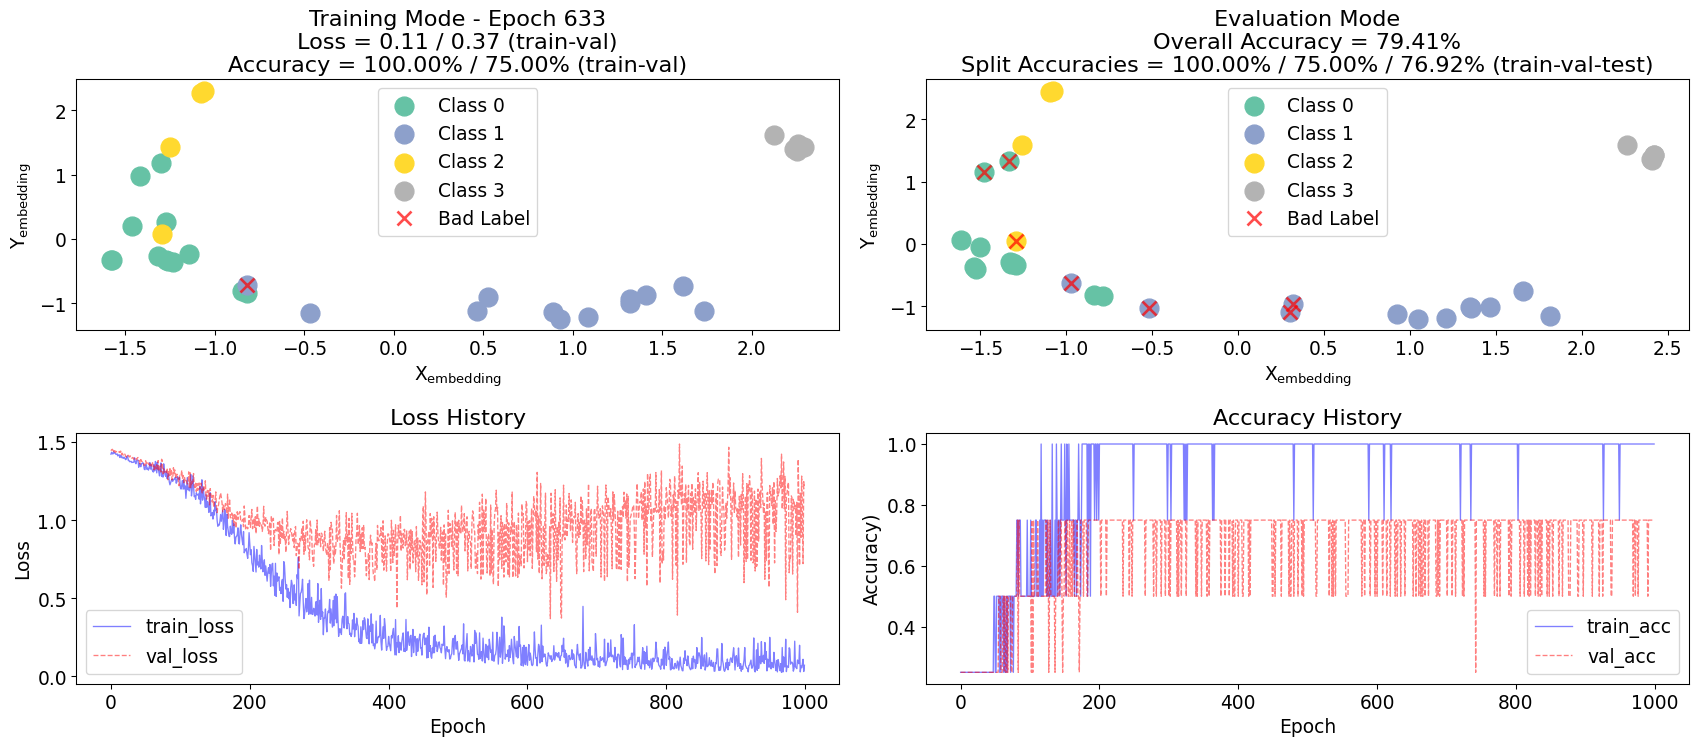

time: 1.59 s (started: 2023-05-01 16:49:20 +00:00)


In [8]:
# @title Visualization
#####################
### VISUALIZATION ###
#####################
# NOTE: The colors of all node markers are according to ground truth by default. Clear `true_color_nodes`
# in the argument to the visualizations to label node markers according to the predicted value. For any 
# non-animation visualization, unless `train_mode` and `eval_mode` are set, the figure does not indicate 
# which nodes are misclassified. In `eval_mode`, all misclassified nodes are indicated with a red X in the
# node marker's middle. In `train_mode`, only the nodes corresponding to the True indices in the boolean
# array in `train_mode_mask` are marked if misclassified. Usually, this will be train_mask + val_mask to
# correctly limit the scope of the training split.

# Note that the validation and training accuracies should be the same in the two embeddings. The embeddings
# themselves will likely not be the same owing to some level of randomness in the dimension reduction.

# Get 2D embeddings.
if use_tsne:
    red_train_embeddings = get_tsne_embeddings(
        gcn_model_params[gcn_epoch_num]["embeddings"],
        random_state=random_state,
        early_exaggeration=early_exaggeration,
        perplexity=perplexity,
        use_prev_embed_to_init_new=use_prev_embed
    )
    red_eval_embeddings = get_tsne_embeddings(
        eval_predictions["embeddings"],
        random_state=random_state,
        early_exaggeration=early_exaggeration,
        perplexity=perplexity,
        use_prev_embed_to_init_new=use_prev_embed
    )
else:
    red_train_embeddings = get_pca_embeddings(gcn_model_params[gcn_epoch_num]["embeddings"], whiten=whiten)
    red_eval_embeddings = get_pca_embeddings(eval_predictions["embeddings"], whiten=whiten)

# Get the trained model's metrics in list format for plotting.
hist_epoch = []
hist_train_loss = []
hist_val_loss = []
hist_train_acc = []
hist_val_acc = []
for epoch, epoch_params in gcn_model_hist.items():
    train_loss, val_loss, train_acc, val_acc = epoch_params["metrics"].values()
    hist_epoch.append(epoch)
    hist_train_loss.append(train_loss)
    hist_val_loss.append(val_loss)    
    hist_train_acc.append(train_acc)
    hist_val_acc.append(val_acc)
 
# Initialize figure and axes.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(fig_max_width_inches, 8), dpi=fig_dpi)
ax1, ax2, ax3, ax4 = axes.flatten()

# Update the subplot axes with the visualizations.
ax1 = ax_visualize_2d_embeddings(
    ax1,
    red_train_embeddings[0],  # the reduced embeddings are returned in list form, even if just one item
    train_epoch=gcn_epoch_num,
    train_metrics=gcn_model_hist[gcn_epoch_num]["metrics"],
    true_labels=true_labels, 
    pred_labels=gcn_model_hist[gcn_epoch_num]["labels"],
    mask_expose_labels=train_mask + val_mask,
    true_color_nodes=True,
    cmap="Set2",
)

ax2 = ax_visualize_2d_embeddings(
    ax2,
    red_eval_embeddings[0],  # the reduced embeddings are returned in list form, even if just one item
    eval_metrics=eval_predictions["accuracies"],
    true_labels=true_labels, 
    pred_labels=gcn_model_hist[gcn_epoch_num]["labels"],
    mask_expose_labels=train_mask + val_mask + test_mask,
    true_color_nodes=True,
    cmap="Set2",
)

ax3 = ax_visualize_loss_history(ax3, hist_epoch, hist_train_loss, hist_val_loss)
ax4 = ax_visualize_acc_history(ax4, hist_epoch, hist_train_acc, hist_val_acc)

# Tweakers.
plt.tight_layout()
plt.subplots_adjust()
plt.show()

In [9]:
# # @title Animation
# # #####################
# # ##### ANIMATION #####
# # #####################
# # Takes time as it deals with the entire training history).
# if use_tsne:
#     red_hist_gcn_embeddings = get_tsne_embeddings(
#         [epoch_params["embeddings"] for epoch_params in gcn_model_hist.values()],
#         random_state=random_state,
#         early_exaggeration=early_exaggeration,
#         perplexity=perplexity,
#         use_prev_embed_to_init_new=use_prev_embed
#     )
# else:
#     red_hist_gcn_embeddings = get_pca_embeddings([epoch_params["embeddings"] for epoch_params in gcn_model_hist.values()], whiten=whiten)

# # Make a copy of the training history and replace the embedding for each epoch with the reduced embeddings.
# gcn_model_hist_red_embeddings = deepcopy(gcn_model_hist)
# for epoch, epoch_params in gcn_model_hist_red_embeddings.items():
#     gcn_model_hist_red_embeddings[epoch]["embeddings"] = red_hist_gcn_embeddings[epoch]

# all_hists.append(gcn_model_hist_red_embeddings)

# fig = plt.figure(figsize=(9, 6), dpi=fig_dpi)
# axes = plt.gca()
# anim = animate_embedding_history(
#     fig,
#     [axes],
#     [gcn_model_hist_red_embeddings],
#     true_labels,
#     mask_expose_labels=None,
#     true_color_nodes=False,
#     display_metrics=True,
#     cmap="Set2",
#     desired_fps=desired_fps
# )
# plt.close()  # to prevent shadow figure alongside animation

# anim.save("GCN.mp4", dpi=96, writer=writer, progress_callback=animation_progress_callback)
# print("\nAnimation saved locally. Converting to HTML for cell output...")
# HTML(anim.to_html5_video())

time: 428 µs (started: 2023-05-01 16:49:22 +00:00)


# B) Graph Sample and Aggregate (GraphSAGE)


In [10]:
# @title Training and Evaluation
#####################
### TRAIN n' EVAL ###
#####################
gsage_model = GraphSAGE(dataset).to(device)
optimizer = Adam(gsage_model.parameters(), lr=learning_rate)

gsage_model, gsage_model_params, gsage_model_hist = train_model(
    gsage_model, data, train_mask, val_mask, criterion=criterion, optimizer=optimizer, num_epochs=num_epochs, 
    modelname="GSAGE", save_history=save_history, return_best_only=return_best_only
)
gsage_epoch_num = list(gsage_model_params.keys())[0]

print("")
eval_predictions = evaluate_model(gsage_model, data, train_mask, val_mask, test_mask)
print("ACTUAL NODE LABELS:\n\t", ", ".join([str(label) for label in data.y.cpu().numpy()]), sep="")
print("PREDICTED NODE LABELS:\n\t", ", ".join([str(label) for label in eval_predictions["labels"]]), sep="")
print("PREDICTION CONFIDENCE SCORES:\n\t", ", ".join([str(round(conf, 2)) for conf in eval_predictions["confidence"]]), sep="")

              [BEST MODEL]              
@ Epoch: 428
Train Accuracy = 100.00%
Val Accuracy: 75.00%
Train Loss: 0.09
Val Loss: 0.71
             [LATEST MODEL]             
@ Epoch: 999
Training Accuracy = 100.00%
Validation Accuracy: 50.00%
Train Loss: 0.07
Val Loss: 1.94
[INFO] Saved and returned best model.

          [EVALUATION RESULTS]          
Overall Accuracy = 47.06%
Training Accuracy: 100.00%
Validation Accuracy: 50.00%
Testing Accuracy: 38.46%
ACTUAL NODE LABELS:
	1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0
PREDICTED NODE LABELS:
	1, 1, 1, 1, 3, 3, 1, 0, 0, 0, 1, 3, 3, 0, 0, 0, 2, 3, 0, 3, 0, 3, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1
PREDICTION CONFIDENCE SCORES:
	-0.03, -0.31, -0.51, -0.67, -0.04, -0.05, -0.05, -0.28, -0.03, -0.04, -0.04, -0.05, -0.18, -0.15, -0.03, -0.03, -0.47, -0.07, -0.03, -0.42, -0.03, -0.07, -0.03, -0.98, -0.05, -0.28, -0.07, -0.04, -0.23, -0.04, -0.45, -0.11, -0.26, -0.22
time: 8.71 s (started: 20

[INFO] Provided embeddings were not a list of embeddings. Forcefully converting them to list.


Reducing embeddings to 2D: 100%|##########| 1/1 [00:00<00:00, 320.15it/s]


[INFO] Provided embeddings were not a list of embeddings. Forcefully converting them to list.


Reducing embeddings to 2D: 100%|##########| 1/1 [00:00<00:00, 587.68it/s]


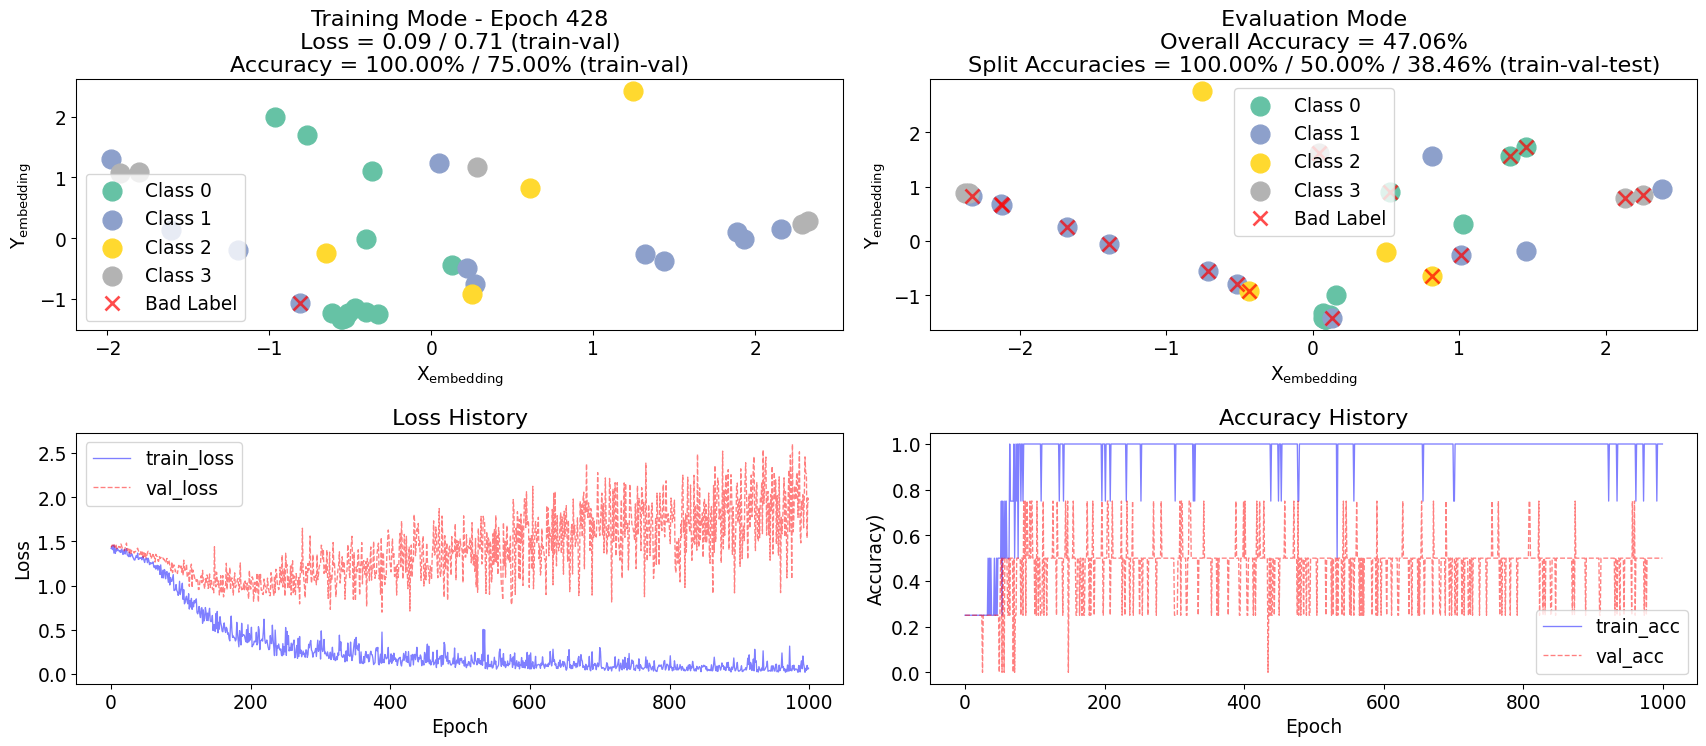

time: 3.24 s (started: 2023-05-01 16:49:30 +00:00)


In [11]:
# @title Visualization
#####################
### VISUALIZATION ###
#####################
if use_tsne:
    red_train_embeddings = get_tsne_embeddings(
        gsage_model_params[gsage_epoch_num]["embeddings"],
        random_state=random_state,
        early_exaggeration=early_exaggeration,
        perplexity=perplexity,
        use_prev_embed_to_init_new=use_prev_embed
    )
    red_eval_embeddings = get_tsne_embeddings(
        eval_predictions["embeddings"],
        random_state=random_state,
        early_exaggeration=early_exaggeration,
        perplexity=perplexity,
        use_prev_embed_to_init_new=use_prev_embed
    )
else:
    red_train_embeddings = get_pca_embeddings(gsage_model_params[gsage_epoch_num]["embeddings"], whiten=whiten)
    red_eval_embeddings = get_pca_embeddings(eval_predictions["embeddings"], whiten=whiten)

hist_epoch = []
hist_train_loss = []
hist_val_loss = []
hist_train_acc = []
hist_val_acc = []
for epoch, epoch_params in gsage_model_hist.items():
    train_loss, val_loss, train_acc, val_acc = epoch_params["metrics"].values()
    hist_epoch.append(epoch)
    hist_train_loss.append(train_loss)
    hist_val_loss.append(val_loss)    
    hist_train_acc.append(train_acc)
    hist_val_acc.append(val_acc)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(fig_max_width_inches, 8), dpi=fig_dpi)
ax1, ax2, ax3, ax4 = axes.flatten()

ax1 = ax_visualize_2d_embeddings(
    ax1,
    red_train_embeddings[0],  # the reduced embeddings are returned in list form, even if just one item
    train_epoch=gsage_epoch_num,
    train_metrics=gsage_model_hist[gsage_epoch_num]["metrics"],
    true_labels=true_labels, 
    pred_labels=gsage_model_hist[gsage_epoch_num]["labels"],
    mask_expose_labels=train_mask + val_mask,
    true_color_nodes=True,
    cmap="Set2",
)

ax2 = ax_visualize_2d_embeddings(
    ax2,
    red_eval_embeddings[0],  # the reduced embeddings are returned in list form, even if just one item
    eval_metrics=eval_predictions["accuracies"],
    true_labels=true_labels, 
    pred_labels=gsage_model_hist[gsage_epoch_num]["labels"],
    mask_expose_labels=train_mask + val_mask + test_mask,
    true_color_nodes=True,
    cmap="Set2",
)

ax3 = ax_visualize_loss_history(ax3, hist_epoch, hist_train_loss, hist_val_loss)
ax4 = ax_visualize_acc_history(ax4, hist_epoch, hist_train_acc, hist_val_acc)

plt.tight_layout()
plt.subplots_adjust()
plt.show()

In [12]:
# # @title Animation
# # #####################
# # ##### ANIMATION #####
# # #####################
# if use_tsne:
#     red_hist_gsage_embeddings = get_tsne_embeddings(
#         [epoch_params["embeddings"] for epoch_params in gsage_model_hist.values()],
#         random_state=random_state,
#         early_exaggeration=early_exaggeration,
#         perplexity=perplexity,
#         use_prev_embed_to_init_new=use_prev_embed
#     )
# else:
#     red_hist_gsage_embeddings = get_pca_embeddings([epoch_params["embeddings"] for epoch_params in gsage_model_hist.values()], whiten=whiten)

# gsage_model_hist_red_embeddings = deepcopy(gsage_model_hist)
# for epoch, epoch_params in gsage_model_hist_red_embeddings.items():
#     gsage_model_hist_red_embeddings[epoch]["embeddings"] = red_hist_gsage_embeddings[epoch]

# all_hists.append(gsage_model_hist_red_embeddings)

# fig = plt.figure(figsize=(9, 6), dpi=fig_dpi)
# axes = plt.gca()
# anim = animate_embedding_history(
#     fig,
#     [axes],
#     [gsage_model_hist_red_embeddings],
#     true_labels,
#     mask_expose_labels=None,
#     true_color_nodes=False,
#     display_metrics=True,
#     cmap="Set2",
#     desired_fps=desired_fps
# )
# plt.close()  # to prevent shadow figure alongside animation

# anim.save("GSAGE.mp4", dpi=96, writer=writer, progress_callback=animation_progress_callback)
# print("\nAnimation saved locally. Converting to HTML for cell output...")
# HTML(anim.to_html5_video())

time: 496 µs (started: 2023-05-01 16:49:34 +00:00)


# C) Graph Attention Network (GAT)



In [13]:
# @title Training and Evaluation
#####################
### TRAIN n' EVAL ###
#####################
gat_model = GAT(dataset).to(device)
optimizer = Adam(gat_model.parameters(), lr=learning_rate)

gat_model, gat_model_params, gat_model_hist = train_model(
    gat_model, data, train_mask, val_mask, criterion=criterion, optimizer=optimizer, num_epochs=num_epochs, 
    modelname="GAT", save_history=save_history, return_best_only=return_best_only
)
gat_epoch_num = list(gat_model_params.keys())[0]

print("")
eval_predictions = evaluate_model(gat_model, data, train_mask, val_mask, test_mask)
print("ACTUAL NODE LABELS:\n\t", ", ".join([str(label) for label in data.y.cpu().numpy()]), sep="")
print("PREDICTED NODE LABELS:\n\t", ", ".join([str(label) for label in eval_predictions["labels"]]), sep="")
print("PREDICTION CONFIDENCE SCORES:\n\t", ", ".join([str(round(conf, 2)) for conf in eval_predictions["confidence"]]), sep="")

              [BEST MODEL]              
@ Epoch: 578
Train Accuracy = 100.00%
Val Accuracy: 100.00%
Train Loss: 0.18
Val Loss: 0.24
             [LATEST MODEL]             
@ Epoch: 999
Training Accuracy = 100.00%
Validation Accuracy: 75.00%
Train Loss: 0.04
Val Loss: 0.48
[INFO] Saved and returned best model.

          [EVALUATION RESULTS]          
Overall Accuracy = 82.35%
Training Accuracy: 100.00%
Validation Accuracy: 75.00%
Testing Accuracy: 80.77%
ACTUAL NODE LABELS:
	1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0
PREDICTED NODE LABELS:
	1, 1, 0, 1, 3, 3, 3, 1, 0, 0, 3, 1, 1, 1, 0, 0, 3, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0
PREDICTION CONFIDENCE SCORES:
	-0.06, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.03, -0.03, -0.05, -0.05, -0.05, -0.32, -0.03, -0.03, -0.05, -0.05, -0.03, -0.43, -0.03, -0.05, -0.03, -0.06, -0.02, -0.02, -0.04, -0.03, -0.04, -0.03, -0.03, -0.03, -0.03, -0.03
time: 19.2 s (started: 2

[INFO] Provided embeddings were not a list of embeddings. Forcefully converting them to list.


Reducing embeddings to 2D: 100%|##########| 1/1 [00:00<00:00, 64.14it/s]


[INFO] Provided embeddings were not a list of embeddings. Forcefully converting them to list.


Reducing embeddings to 2D: 100%|##########| 1/1 [00:00<00:00, 553.56it/s]


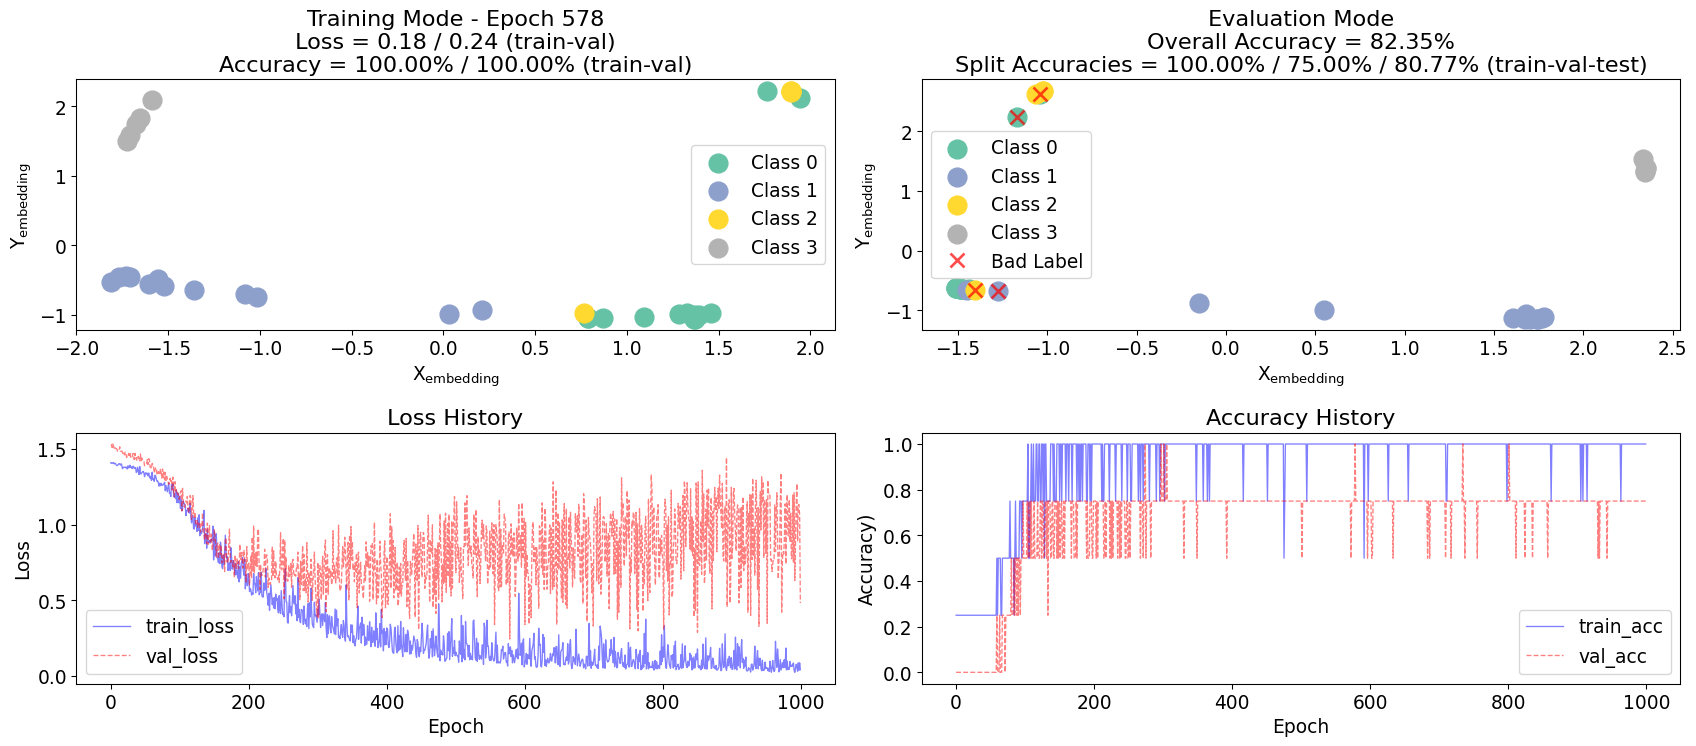

time: 4.14 s (started: 2023-05-01 16:49:53 +00:00)


In [14]:
# @title Visualization
#####################
### VISUALIZATION ###
#####################
if use_tsne:
    red_train_embeddings = get_tsne_embeddings(
        gat_model_params[gat_epoch_num]["embeddings"],
        random_state=random_state,
        early_exaggeration=early_exaggeration,
        perplexity=perplexity,
        use_prev_embed_to_init_new=use_prev_embed
    )
    red_eval_embeddings = get_tsne_embeddings(
        eval_predictions["embeddings"],
        random_state=random_state,
        early_exaggeration=early_exaggeration,
        perplexity=perplexity,
        use_prev_embed_to_init_new=use_prev_embed
    )
else:
    red_train_embeddings = get_pca_embeddings(gat_model_params[gat_epoch_num]["embeddings"], whiten=whiten)
    red_eval_embeddings = get_pca_embeddings(eval_predictions["embeddings"], whiten=whiten)

hist_epoch = []
hist_train_loss = []
hist_val_loss = []
hist_train_acc = []
hist_val_acc = []
for epoch, epoch_params in gat_model_hist.items():
    train_loss, val_loss, train_acc, val_acc = epoch_params["metrics"].values()
    hist_epoch.append(epoch)
    hist_train_loss.append(train_loss)
    hist_val_loss.append(val_loss)    
    hist_train_acc.append(train_acc)
    hist_val_acc.append(val_acc)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(fig_max_width_inches, 8), dpi=fig_dpi)
ax1, ax2, ax3, ax4 = axes.flatten()

ax1 = ax_visualize_2d_embeddings(
    ax1,
    red_train_embeddings[0],  # the reduced embeddings are returned in list form, even if just one item
    train_epoch=gat_epoch_num,
    train_metrics=gat_model_hist[gat_epoch_num]["metrics"],
    true_labels=true_labels, 
    pred_labels=gat_model_hist[gat_epoch_num]["labels"],
    mask_expose_labels=train_mask + val_mask,
    true_color_nodes=True,
    cmap="Set2",
)

ax2 = ax_visualize_2d_embeddings(
    ax2,
    red_eval_embeddings[0],  # the reduced embeddings are returned in list form, even if just one item
    eval_metrics=eval_predictions["accuracies"],
    true_labels=true_labels, 
    pred_labels=gat_model_hist[gat_epoch_num]["labels"],
    mask_expose_labels=train_mask + val_mask + test_mask,
    true_color_nodes=True,
    cmap="Set2",
)

ax3 = ax_visualize_loss_history(ax3, hist_epoch, hist_train_loss, hist_val_loss)
ax4 = ax_visualize_acc_history(ax4, hist_epoch, hist_train_acc, hist_val_acc)

plt.tight_layout()
plt.subplots_adjust()
plt.show()

In [15]:
# # @title Animation
# # #####################
# # ##### ANIMATION #####
# # #####################
# if use_tsne:
#     red_hist_gat_embeddings = get_tsne_embeddings(
#         [epoch_params["embeddings"] for epoch_params in gat_model_hist.values()],
#         random_state=random_state,
#         early_exaggeration=early_exaggeration,
#         perplexity=perplexity,
#         use_prev_embed_to_init_new=use_prev_embed
#     )
# else:
#     red_hist_gat_embeddings = get_pca_embeddings([epoch_params["embeddings"] for epoch_params in gat_model_hist.values()], whiten=whiten)

# gat_model_hist_red_embeddings = deepcopy(gat_model_hist)
# for epoch, epoch_params in gat_model_hist_red_embeddings.items():
#     gat_model_hist_red_embeddings[epoch]["embeddings"] = red_hist_gat_embeddings[epoch]

# all_hists.append(gat_model_hist_red_embeddings)

# fig = plt.figure(figsize=(9, 6), dpi=fig_dpi)
# axes = plt.gca()
# anim = animate_embedding_history(
#     fig,
#     [axes],
#     [gat_model_hist_red_embeddings],
#     true_labels,
#     mask_expose_labels=None,
#     true_color_nodes=False,
#     display_metrics=True,
#     cmap="Set2",
#     desired_fps=desired_fps
# )
# plt.close()  # to prevent shadow figure alongside animation

# anim.save("GAT.mp4", dpi=96, writer=writer, progress_callback=animation_progress_callback)
# print("\nAnimation saved locally. Converting to HTML for cell output...")
# HTML(anim.to_html5_video())

time: 497 µs (started: 2023-05-01 16:49:57 +00:00)


# Side-by-side Animation of Embedding Histories
For best view, collapse everything other than the editor.

In [ ]:
# @title SBS Animations
#####################
# SIDE BY SIDE ANIM #
#####################
if not all_hists:
    if use_tsne:
        red_hist_gcn_embeddings = get_tsne_embeddings(
            [epoch_params["embeddings"] for epoch_params in gcn_model_hist.values()],
            random_state=random_state,
            early_exaggeration=early_exaggeration,
            perplexity=perplexity,
            use_prev_embed_to_init_new=use_prev_embed
        )
        red_hist_gsage_embeddings = get_tsne_embeddings(
            [epoch_params["embeddings"] for epoch_params in gsage_model_hist.values()],
            random_state=random_state,
            early_exaggeration=early_exaggeration,
            perplexity=perplexity,
            use_prev_embed_to_init_new=use_prev_embed
        )
        red_hist_gat_embeddings = get_tsne_embeddings(
            [epoch_params["embeddings"] for epoch_params in gat_model_hist.values()],
            random_state=random_state,
            early_exaggeration=early_exaggeration,
            perplexity=perplexity,
            use_prev_embed_to_init_new=use_prev_embed
        )
    else:
        red_hist_gcn_embeddings = get_pca_embeddings(
            [epoch_params["embeddings"] for epoch_params in gcn_model_hist.values()], 
            whiten=whiten
        )
        red_hist_gsage_embeddings = get_pca_embeddings(
            [epoch_params["embeddings"] for epoch_params in gsage_model_hist.values()], 
            whiten=whiten
        )
        red_hist_gat_embeddings = get_pca_embeddings(
            [epoch_params["embeddings"] for epoch_params in gat_model_hist.values()], 
            whiten=whiten
        )

    gcn_model_hist_red_embeddings = deepcopy(gcn_model_hist)
    for epoch, epoch_params in gcn_model_hist_red_embeddings.items():
        gcn_model_hist_red_embeddings[epoch]["embeddings"] = red_hist_gcn_embeddings[epoch]
    gsage_model_hist_red_embeddings = deepcopy(gsage_model_hist)
    for epoch, epoch_params in gsage_model_hist_red_embeddings.items():
        gsage_model_hist_red_embeddings[epoch]["embeddings"] = red_hist_gsage_embeddings[epoch]
    gat_model_hist_red_embeddings = deepcopy(gat_model_hist)
    for epoch, epoch_params in gat_model_hist_red_embeddings.items():
        gat_model_hist_red_embeddings[epoch]["embeddings"] = red_hist_gat_embeddings[epoch]

    all_hists = [gcn_model_hist_red_embeddings, gsage_model_hist_red_embeddings, gat_model_hist_red_embeddings]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(fig_max_width_inches, fig_max_height_inches), dpi=fig_dpi)
anim = animate_embedding_history(
    fig,
    axes,
    all_hists,
    true_labels,
    mask_expose_labels=None,
    true_color_nodes=False,
    display_metrics=True,
    cmap="Set2",
    desired_fps=desired_fps
)
plt.tight_layout()
plt.subplots_adjust(wspace=24)
plt.close()

anim.save("all_models_together.mp4", dpi=96, writer=writer, progress_callback=animation_progress_callback)
print("\nAnimation saved locally. Converting to HTML for cell output...")
print("History 1 = GCN, History 2 = GraphSAGE, History 3 = GAT")
HTML(anim.to_html5_video())

Reducing embeddings to 2D: 100%|##########| 1000/1000 [00:00<00:00, 1624.26it/s]


Saving frame: 1000/1000
Animation saved locally. Converting to HTML for cell output...
History 1 = GCN, History 2 = GraphSAGE, History 3 = GAT


# IGNORE

In [ ]:
# video_files = ['GCN.mp4', 'GSAGE.mp4', 'GAT.mp4']
# num_videos = len(video_files)

# # Init capture objects on each video file.
# videos = [cv2.VideoCapture(video_file) for video_file in video_files]

# # Get video properties
# num_frames = [int(video.get(cv2.CAP_PROP_FRAME_COUNT)) for video in videos]
# framerate = min([int(video.get(cv2.CAP_PROP_FPS)) for video in videos])

# # Longest frame duration on minimum framerate
# longest_frame_duration = 1000 / framerate  

# # Shape for black images when video ends
# width = int(videos[0].get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(videos[0].get(cv2.CAP_PROP_FRAME_HEIGHT))
# shape = (height, width)

# # Set up the figure and subplots
# fig, axes = plt.subplots(1, num_videos, figsize=(6*num_videos, 4), dpi=96)

# # Animate callback
# def update(frame, videos, axes, num_frames, shape):
#     for i, (video, ax) in enumerate(zip(videos, axes)):
#         # Loop video if ended
#         video.set(cv2.CAP_PROP_POS_FRAMES, frame % num_frames[i]) 
#         # Clear axis from previous iteration
#         ax.cla()
#         # Remove the axis guides
#         ax.axis("off")
        
#         # Read in the frame
#         ret, img = video.read()
#         if ret:
#             # Convert image to RGB and display on axis
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#             ax.imshow(img)
#         else:
#             # If the read fails
#             black = np.zeros(shape, dtype=np.uint8)
#             ax.imshow(black)
    
#     # Tighten between and around subplot
#     fig.tight_layout()
#     fig.subplots_adjust(wspace=0.1)

# plt.close()

# anim = FuncAnimation(
#     fig, 
#     update, 
#     frames=max(num_frames), 
#     fargs=(videos, axes, num_frames, shape,), 
#     interval=longest_frame_duration, 
#     blit=False, 
#     repeat=True)

# anim.save("all_models.mp4", dpi=96, writer=writer, progress_callback=animation_progress_callback)

# # Free up OpenCV.
# for video in videos:
#     video.release()

# # I don't know how it works but it does. Can't use anim.to_html_5 because we need to free up OpenCV.
# # If we free up OpenCV before displaying as html 5, the video doesn't render. If we free up OpenCV
# # after outputting to HTML 5, the output cell does not update for some reason. 

# # Current Solution: https://stackoverflow.com/questions/57377185/how-play-mp4-video-in-google-colab
# # Another solution is to release captures in the next cell block, but that would be somewhat cumbersome.
# mp4 = open('all_models.mp4','rb').read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML("""
# <video controls loop>
#       <source src="%s" type="video/mp4">
# </video>
# """ % data_url)

In [ ]:
# Free up OpenCV.
# for video in videos:
#     video.release()

In [ ]:
# FOR GIFS. Sadly, can't view them locally at any given point since they are gifs.
# But, good for short loops.
# =================================================================================
# from PIL import Image, ImageSequence
# plt.rcParams.update({'font.size': 14})

# video_files = ['GCN.gif', 'GSAGE.gif', 'GAT.gif']
# num_videos = len(video_files)

# # Load the videos using PIL
# videos = [Image.open(video_file) for video_file in video_files]

# # Get the number of frames and the duration of each frame
# num_frames = [video.n_frames for video in videos]
# frame_durations = [video.info['duration'] for video in videos]

# # Set up the Matplotlib figure and subplots
# fig, axes = plt.subplots(1, num_videos, figsize=(6*num_videos, 4), dpi=96)

# # Animate
# def update(frame, videos, axes, num_frames):
#     for i, (video, ax) in enumerate(zip(videos, axes)):
#         ax.cla()
#         ax.axis("off")
#         video.seek(frame % num_frames[i])  # Loop the video when it reaches the end
#         ax.imshow(video.convert('RGBA'))
#     fig.tight_layout()
#     fig.subplots_adjust(wspace=0.1)

# plt.close()
# anim = FuncAnimation(fig, update, frames=max(num_frames), fargs=(videos, axes, num_frames), interval=max(frame_durations), blit=False, repeat=True)
# anim.save("all_models.gif", dpi=96, writer=writer, progress_callback=animation_progress_callback)
# HTML(anim.to_html5_video())